# 本章目标
- 熟练掌握本章节的所有操作
- 可以独立编写日常报表脚本
- 独立制作一份数据分析报表

In [53]:
#导入库
import pandas as pd

# Pandas数据结构 

## Series 
Series是一种**类似于一维数组**的对象，由**一组数据**以及一组与之相关的**数据标签**(即索引)组成。

In [54]:
import pandas as pd
#新建一个Series
#传入一个list
#数据标签默认从0开始
obj=pd.Series(["A","B","C","D","E"])
obj

0    A
1    B
2    C
3    D
4    E
dtype: object

In [55]:
#获取Series的索引
obj.index

RangeIndex(start=0, stop=5, step=1)

In [56]:
#获取Series的值
obj.values

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [57]:
#指定索引
obj=pd.Series(["A","B","C","D"],index=["a","b","c","d"])
obj

a    A
b    B
c    C
d    D
dtype: object

In [58]:
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
#传入一个字典
data={"a":"A","b":"B","c":"C","d":"D"}
obj=pd.Series(data)
obj

a    A
b    B
c    C
d    D
dtype: object

## DataFrame
DataFrame是一个表格型的数据结构，既有行索引又有列索引的一种数据结构

In [60]:
index=['a', 'b', 'c', 'd']
columns=["对应大写字母"]
data=["A","B","C","D"]
pd.DataFrame(data,columns=columns,index=index)

,对应大写字母
a,A
b,B
c,C
d,D


In [61]:
index=['第一', '第二', '第三', '第四']
columns=["技能"]
data=["Excel","Sql","Python","PPT"]
pd.DataFrame(data,columns=columns,index=index)

,技能
第一,Excel
第二,Sql
第三,Python
第四,PPT


In [62]:
#获取Dataframe的列索引
df = pd.DataFrame(data,columns=columns,index=index)
df.columns

Index(['技能'], dtype='object')

In [63]:
#获取DataFrame的行索引
df.index

Index(['第一', '第二', '第三', '第四'], dtype='object')

In [64]:
#获取Dataframe的值
df.values

array([['Excel'],
       ['Sql'],
       ['Python'],
       ['PPT']], dtype=object)

In [65]:
index=['第一', '第二', '第三', '第四']
columns=["技能","周数"]
data=[["Excel","week1"],
      ["Python","week2"],
      ["Sql","week1"],
      ["PPT","week1"]]
pd.DataFrame(data,columns=columns,index=index)

,技能,周数
第一,Excel,week1
第二,Python,week2
第三,Sql,week1
第四,PPT,week1


In [66]:
#传入一个字典
data2={"等级":[1,2,3,4],"分绩":[90,80,70,60]}
df12=pd.DataFrame(data2,index=["student1","student2","student3","student4"] )
df12

,等级,分绩
student1,1,90
student2,2,80
student3,3,70
student4,4,60


# 准备食材-数据源的获取

## 外部导入数据 

### 导入excel文件 

In [17]:
df112=pd.read_excel(r"pandas_train.xlsx")
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [67]:
#指定导入的sheet,直接传入sheet名，默认导入第一个sheet
pd.read_excel(r"pandas_train.xlsx",sheet_name="这是第二个Sheet")

,用户编号,好坏客户,年龄,负债率
0,1,1,45,0.802982
1,2,0,57,5710.000000
2,3,0,38,0.085113


In [68]:
#指定导入的sheet,直接传入sheet的顺序数
pd.read_excel(r"pandas_train.xlsx",sheet_name=1)

,用户编号,好坏客户,年龄,负债率
0,1,1,45,0.802982
1,2,0,57,5710.000000
2,3,0,38,0.085113


In [69]:
#指定行索引，传入列名
pd.read_excel(r"pandas_train.xlsx",sheet_name=1,index_col = "用户编号")

,好坏客户,年龄,负债率
用户编号,,,
1,1,45,0.802982
2,0,57,5710.000000
3,0,38,0.085113


In [70]:
#指定行索引，传入列数
pd.read_excel(r"pandas_train.xlsx",sheet_name=1,index_col = 0)

,好坏客户,年龄,负债率
用户编号,,,
1,1,45,0.802982
2,0,57,5710.000000
3,0,38,0.085113


In [71]:
#指定导入列，传入列数
aa=pd.read_excel(r"pandas_train.xlsx",sheet_name=1,usecols = [0,1])

In [72]:
aa = pd.read_excel(r"pandas_train.xlsx",sheet_name=1) #,usecols = [0,1]

In [73]:
help(aa.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.') method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series was changed.
    
    Parameters
    ----------
    path_or_buf : str or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.  If a file object is passed it should be opened with
        `newline=''`, disabling universal newlines.
    
        .. versionchanged:: 0.24.0
    
           Was previously named "path" for Series.
    
    sep : str, default ','
        String of l

In [74]:
aa.to_csv('pandas_train.csv',encoding="gbk")

### 导入CSV文件 
pd.read_csv(path)

In [75]:
#直接导入
df111=pd.read_csv(r"pandas_train.csv")
df111.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd3 in position 0: invalid continuation byte

In [76]:
#指明解析方式
df111=pd.read_csv(r"pandas_train.csv",encoding="gbk",engine='python')
df111.head()

,Unnamed: 0,用户编号,好坏客户,年龄,负债率
0,0,1,1,45,0.802982
1,1,2,0,57,5710.000000
2,2,3,0,38,0.085113


In [77]:
#指明分割符,默认是逗号分割
pd.read_csv("pandas_train.csv",sep = ", ").head()

C:\Users\lining\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,",用户编号,好坏客户,年龄,负债率"
0,"0,1,1,45,0.802982129"
1,"1,2,0,57,5710.0"
2,"2,3,0,38,0.085113375"


In [78]:
#忽略行数
#使用关键词skiprows
df111=pd.read_csv(r"pandas_train.csv",encoding="gbk",skiprows=[1,5])
df111.head()

,Unnamed: 0,用户编号,好坏客户,年龄,负债率
0,1,2,0,57,5710.000000
1,2,3,0,38,0.085113


In [79]:
#指定读取行数
#使用关键词nrows
df111=pd.read_csv(r"pandas_train.csv",encoding="gbk",nrows=5)
df111.head()

,Unnamed: 0,用户编号,好坏客户,年龄,负债率
0,0,1,1,45,0.802982
1,1,2,0,57,5710.000000
2,2,3,0,38,0.085113


In [81]:
#导入部分列
#使用参数usecols
df111=pd.read_csv(r"pandas_train.csv",encoding="gbk",usecols=["好坏客户","年龄"])
df111.head()

,好坏客户,年龄
0,1,45
1,0,57
2,0,38


### 导入txt文件 

In [83]:
import pandas as pd
df113=pd.read_table(r"pandas_train.csv",sep=",",engine = "python",encoding="gbk")
df113.head()

C:\Users\lining\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Unnamed: 0,用户编号,好坏客户,年龄,负债率
0,0,1,1,45,0.802982
1,1,2,0,57,5710.000000
2,2,3,0,38,0.085113


### 导入sql文件 

In [ ]:
pip install pymysql

### 各种文件对比

In [80]:
#导入excel文件用时
%time df115=pd.read_excel(r"D:\Data-Science\share\data\pandas_train.xlsx",encoding="gbk")

Wall time: 18.8 s


In [79]:
#导入csv文件用时
%time df115=pd.read_csv(r"D:\Data-Science\share\data\pandas_train.csv",encoding="gbk")

Wall time: 190 ms


In [81]:
#导入txt文件用时
%time df115=pd.read_table(r"D:\Data-Science\share\data\pandas_train.txt",sep=",",encoding="gbk")

Wall time: 207 ms


同样数量的数据，导入excel格式是导入csv格式的10倍,所以尽量将表转化为csv以后进行处理

## 新建数据 

## 数据熟悉

In [7]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [8]:
df112.head(2)

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0


In [9]:
df112.shape

(150000, 8)

In [85]:
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          150000 non-null int64
好坏客户          150000 non-null int64
年龄            150000 non-null int64
负债率           150000 non-null float64
月收入           120268 non-null float64
逾期90天笔数       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家庭成员          146076 non-null float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


In [86]:
df112.describe()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202680e+05,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,52.295320,353.043142,6.670255e+03,0.265973,0.240387,0.757215
std,43301.414527,0.249746,14.771837,2037.865260,1.438473e+04,4.169304,4.155179,1.115088
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,0.175074,3.400000e+03,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,52.000000,0.366516,5.400000e+03,0.000000,0.000000,0.000000
75%,112500.250000,0.000000,63.000000,0.868292,8.249000e+03,0.000000,0.000000,1.000000
max,150000.000000,1.000000,109.000000,329664.000000,3.008750e+06,98.000000,98.000000,20.000000


# 淘米洗菜-数据预处理

## 缺失值处理

### 缺失值查看 

In [14]:
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          150000 non-null int64
好坏客户          150000 non-null int64
年龄            150000 non-null int64
负债率           150000 non-null float64
月收入           120268 non-null float64
逾期90天笔数       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家庭成员          146076 non-null float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


### 删除缺失值 

In [87]:
#dropna()默认删除含有缺失值得行
df411=df112.dropna()
df411.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120268 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          120268 non-null int64
好坏客户          120268 non-null int64
年龄            120268 non-null int64
负债率           120268 non-null float64
月收入           120268 non-null float64
逾期90天笔数       120268 non-null int64
逾期60-89天笔数    120268 non-null int64
家庭成员          120268 non-null float64
dtypes: float64(3), int64(5)
memory usage: 8.3 MB


In [88]:
#删除全为缺失值的行
df411=df112.dropna(how="all")
df411.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          150000 non-null int64
好坏客户          150000 non-null int64
年龄            150000 non-null int64
负债率           150000 non-null float64
月收入           120268 non-null float64
逾期90天笔数       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家庭成员          146076 non-null float64
dtypes: float64(3), int64(5)
memory usage: 10.3 MB


要用这种方式丢弃列，只需传入axis=1即可

### 填充缺失值 

fillna()和dropna()默认会返回一个替换后的新对象，不改变源数据，这个时候将替换后的数据赋值给新的表，如果要改变源数据，通过传入inplace=True进行更改

In [78]:
#对表df112中的所有缺失值均填充为0，excel中的空值定位条件
df412=df112.fillna(0)
df412.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          150000 non-null int64
好坏客户          150000 non-null int64
年龄            150000 non-null int64
负债率           150000 non-null float64
月收入           150000 non-null float64
逾期90天笔数       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家庭成员          150000 non-null float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


In [96]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,0.0,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [97]:
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          150000 non-null int64
好坏客户          150000 non-null int64
年龄            150000 non-null int64
负债率           150000 non-null float64
月收入           150000 non-null float64
逾期90天笔数       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家庭成员          150000 non-null float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


In [103]:
# 以字典的形式指明要填充的列名
df112.fillna({"月收入":0}).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,0.0,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


## 重复值处理
对于重复值我们一般是进行删除处理,使用的方法是drop_duplicates()

In [98]:
#subset表示按哪列/几列进行去重
#keep=first表示保留保留第一个，=last表示保留最后一个，=False表示删除所有重复值，默认是first
#inplace表示是否更改源数据
df112.drop_duplicates(subset=None, keep='first', inplace=False).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,0.0,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [99]:
#按某一列进行去重
df112.drop_duplicates(subset="好坏客户").head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,0.0,0,0,0.0


In [101]:
#按多列进行去重
df112.drop_duplicates(subset=["好坏客户","家属成员"])

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,0.0,0,0,0.0


## 异常值处理 

### 异常值检测
- 根据业务经验划定不同指标的正常范围，超过该范围的值算作异常值。
- 通过绘制箱形图，把大于（小于）箱形图上边缘（下边缘）的点称为异常值。
- 如果数据服从正态分布，则可以利用3σ原则；如果一个数值与平均值之间的偏差超过3倍标准差，那么我们就认为这个值是异常值。

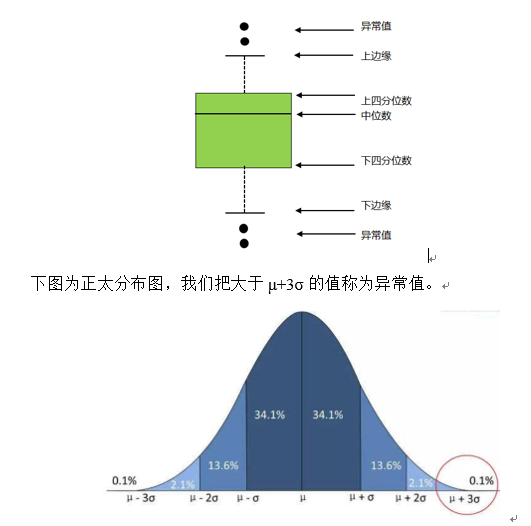

### 异常值处理
- 最常用的处理方式就是删除。
- 把异常值当作缺失值来填充。
- 把异常值当作特殊情况，研究异常值出现的原因。

## 数据类型转换 

### 数据类型 

| 类型|说明|
|----|----|
|int|整型数,即整数|
|float|浮点数，即含有小数点|
|object|python对象类型,用O表示|
|string_ |字符串类型，经常用S表示，S10表示长度为10的字符串|
|unicode_  |固定长度的unicode类型，跟字符串定义方式一样，经常用U表示|

In [84]:
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
用户编号          150000 non-null int64
好坏客户          150000 non-null int64
年龄            150000 non-null int64
负债率           150000 non-null float64
月收入           120268 non-null float64
逾期90天笔数       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家庭成员          146076 non-null float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


In [89]:
df112["用户编号"].dtype

dtype('int64')

### 类型转换 

In [90]:
df112["用户编号"].astype(np.object).dtype

dtype('O')

In [149]:
df112["用户编号"].astype(np.float64).dtype

dtype('float64')

In [154]:
df112["用户编号"].dtype

dtype('float64')

In [153]:
df112["用户编号"]=df112["用户编号"].astype(np.float64)

In [138]:
df112["用户编号"].dtype

dtype('int64')

In [139]:
df12

,成绩,等级
student1,90,优
student2,80,良
student3,70,中
student4,60,差


## 索引设置 

### 为无索引表设置索引 

In [79]:
data=[["Excel","week1"],
      ["Python","week2"],
      ["Sql","week1"],
      ["PPT","week1"]]
df = pd.DataFrame(data)
df

,0,1
0,Excel,week1
1,Python,week2
2,Sql,week1
3,PPT,week1


In [80]:
df.columns = ["技能","周数"]
df.index = ['第一', '第二', '第三', '第四']
df

,技能,周数
第一,Excel,week1
第二,Python,week2
第三,Sql,week1
第四,PPT,week1


### 重新设置索引 

In [155]:
#设置单一索引
df112.set_index("用户编号").head()

,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
用户编号,,,,,,,
1,是,45,0.802982,9120.0,0,0,2.0
2,否,57,5710.000000,NaN,0,0,0.0
3,否,38,0.085113,3042.0,1,0,0.0
4,否,30,0.036050,3300.0,0,0,0.0
5,否,49,0.024926,63588.0,0,0,0.0


In [82]:
#设置层次化索引
df64=df112.set_index(["家庭成员","好坏客户"])
df64

用户编号  年龄          负债率      月收入  逾期90天笔数  逾期60-89天笔数
家庭成员 好坏客户                                                       
2.0  1          1  45     0.802982   9120.0        0           0
0.0  0          2  57  5710.000000      NaN        0           0
     0          3  38     0.085113   3042.0        1           0
     0          4  30     0.036050   3300.0        0           0
     0          5  49     0.024926  63588.0        0           0
1.0  0          6  74     0.375607   3500.0        0           0
0.0  0          7  57  5710.000000      NaN        0           0
     0          8  39     0.209940   3500.0        0           0
NaN  0          9  27    46.000000      NaN        0           0
2.0  0         10  57     0.606291  23684.0        0           0
0.0  0         11  30     0.309476   2500.0        0           0
2.0  0         12  51     0.531529   6501.0        0           0
     0         13  46     0.298354  12454.0        0           0
     1         14  40     0.382965  13700.0        3           1
0.0  0         15  76   477.000000      0.0        0           0
2.0  0         16  64     0.209892  11362.0        0           0
0.0  0         17  78  2058.000000      NaN        0           0
     0         18  53     0.188274   8800.0        0           0
2.0  0         19  43     0.527888   3280.0        0           0
0.0  0         20  25     0.065868    333.0        0           0
     0         21  43     0.430046  12300.0        0           0
2.0  1         22  38     0.475841   3000.0        0           0
0.0  0         23  39     0.241104   2500.0        0           0
     0         24  32     0.085512   7916.0        0           0
     0         25  58     0.241622   2416.0        0           0
1.0  1         26  50     1.595253   4676.0        0           0
0.0  0         27  58     0.097672   8333.0        0           0
1.0  0         28  69     0.042383   2500.0        0           0
0.0  0         29  24     0.011761   3400.0        0           0
     0         30  58     0.436103   5500.0        0           0
...           ...  ..          ...      ...      ...         ...
2.0  0     149971  58     0.253855  15500.0        0           0
0.0  0     149972  83     0.013997   5000.0        0           0
1.0  0     149973  42     0.008638   6945.0        0           0
     0     149974  44     0.494819   5500.0        0           0
0.0  0     149975  61     0.603479   5000.0        0           0
     0     149976  58  2716.000000      NaN        0           0
     0     149977  76    60.000000      NaN        0           0
     0     149978  29   349.000000      NaN        0           0
     0     149979  52     0.259496   2500.0        0           0
     1     149980  55     0.057235   8700.0        0           0
     0     149981  64     0.254976   5525.0        0           0
4.0  0     149982  43     0.121752   6849.0        0           0
3.0  0     149983  37     0.250272   2760.0        0           0
0.0  0     149984  82     0.000800   5000.0        0           0
     0     149985  84    25.000000      NaN        0           0
     0     149986  26     0.324962   1950.0        0           0
1.0  0     149987  49     0.080384   5000.0        0           0
0.0  0     149988  28     0.055692   3249.0        1           0
     0     149989  31     0.347924   7515.0        0           0
3.0  0     149990  62     0.001408   9233.0        0           0
2.0  0     149991  46     0.609779   4335.0        0           0
0.0  0     149992  59     0.477658  10316.0        0           0
3.0  0     149993  50  4132.000000      NaN        0           0
0.0  0     149994  22     0.000000    820.0        0           0
     0     149995  50     0.404293   3400.0        0           0
     0     149996  74     0.225131   2100.0        0           0
2.0  0     149997  44     0.716562   5584.0        0           0
0.0  0     149998  58  3870.000000      NaN        0           0
     0     149999  30     0.000000   5716.0     

### 重命名索引 

In [167]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1.0,是,45,0.802982,9120.0,0,0,2.0
1,2.0,否,57,5710.000000,NaN,0,0,0.0
2,3.0,否,38,0.085113,3042.0,1,0,0.0
3,4.0,否,30,0.036050,3300.0,0,0,0.0
4,5.0,否,49,0.024926,63588.0,0,0,0.0


In [171]:
#利用rename的方法对行/列名进行重命名
columns={"用户编号":"用户编号-测试",
        "好坏客户":"好坏客户-测试"}
index={0:"zero",
      1:"one"}
df112.rename(columns=columns,index=index).head()

,用户编号-测试,好坏客户-测试,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
zero,1.0,是,45,0.802982,9120.0,0,0,2.0
one,2.0,否,57,5710.000000,NaN,0,0,0.0
2,3.0,否,38,0.085113,3042.0,1,0,0.0
3,4.0,否,30,0.036050,3300.0,0,0,0.0
4,5.0,否,49,0.024926,63588.0,0,0,0.0


### 重置索引 

reset_index(level=None, drop=False, inplace=False)

level 参数用来指定要将层次化索引的第几级别转化为 columns，第一个索引为 0 级，第二个索引为 1 级，默认为全部索引，即默认把索引全部转化为 columns。 

drop参数用来指定是否将原索引删掉，即不作为一个新的columns，默认为False， 即不删除原索引。

inplace 参数用来指定是否修改原数据表。 

In [83]:
df64.reset_index()

,家庭成员,好坏客户,用户编号,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数
0,2.0,1,1,45,0.802982,9120.0,0,0
1,0.0,0,2,57,5710.000000,NaN,0,0
2,0.0,0,3,38,0.085113,3042.0,1,0
3,0.0,0,4,30,0.036050,3300.0,0,0
4,0.0,0,5,49,0.024926,63588.0,0,0
5,1.0,0,6,74,0.375607,3500.0,0,0
6,0.0,0,7,57,5710.000000,NaN,0,0
7,0.0,0,8,39,0.209940,3500.0,0,0
8,NaN,0,9,27,46.000000,NaN,0,0
9,2.0,0,10,57,0.606291,23684.0,0,0


# 菜品挑选-数据选择

## 列选择 

In [41]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


### 选择某一列/某几列

In [43]:
#获取某一列，其实就是一个Series
df112["家庭成员"].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 家庭成员, dtype: float64

In [131]:
#获取特定的某几列
df112[["用户编号","年龄"]].head()

,用户编号,年龄
0,1,45
1,2,57
2,3,38
3,4,30
4,5,49


In [6]:
df112.iloc[:,[0,2]].head()

,用户编号,年龄
0,1,45
1,2,57
2,3,38
3,4,30
4,5,49


### 选择连续的某几列

In [8]:
df112.iloc[:,0:3].head()

,用户编号,好坏客户,年龄
0,1,1,45
1,2,0,57
2,3,0,38
3,4,0,30
4,5,0,49


## 行选择 

### 选择某行/某几行

In [10]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [15]:
index = {0:"零",
         1:"一",
         2:"二",
         3:"三"}
df521 = df112.rename(index = index)
df521.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
零,1,1,45,0.802982,9120.0,0,0,2.0
一,2,0,57,5710.000000,NaN,0,0,0.0
二,3,0,38,0.085113,3042.0,1,0,0.0
三,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [18]:
df521.loc["零"]

用户编号             1.000000
好坏客户             1.000000
年龄              45.000000
负债率              0.802982
月收入           9120.000000
逾期90天笔数          0.000000
逾期60-89天笔数       0.000000
家庭成员             2.000000
Name: 零, dtype: float64

In [19]:
df521.loc[["零","二"]]

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
零,1,1,45,0.802982,9120.0,0,0,2.0
二,3,0,38,0.085113,3042.0,1,0,0.0


In [21]:
df521.iloc[0]

用户编号             1.000000
好坏客户             1.000000
年龄              45.000000
负债率              0.802982
月收入           9120.000000
逾期90天笔数          0.000000
逾期60-89天笔数       0.000000
家庭成员             2.000000
Name: 零, dtype: float64

In [23]:
df521.iloc[[0,2]]

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
零,1,1,45,0.802982,9120.0,0,0,2.0
二,3,0,38,0.085113,3042.0,1,0,0.0


### 选择连续的某几行 

In [24]:
df521.iloc[0:5]

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
零,1,1,45,0.802982,9120.0,0,0,2.0
一,2,0,57,5710.000000,NaN,0,0,0.0
二,3,0,38,0.085113,3042.0,1,0,0.0
三,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


### 筛选满足条件的行
用来获取满足某个条件的行

In [121]:
df112[df112["用户编号"]<5]

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,0.0,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0


In [45]:
df112[(df112["用户编号"]>10)|(df112["年龄"]<25)]

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
10,11,0,30,0.309476,2500.0,0,0,0.0
11,12,0,51,0.531529,6501.0,0,0,2.0
12,13,0,46,0.298354,12454.0,0,0,2.0
13,14,1,40,0.382965,13700.0,3,1,2.0
14,15,0,76,477.000000,0.0,0,0,0.0
15,16,0,64,0.209892,11362.0,0,0,2.0
16,17,0,78,2058.000000,NaN,0,0,0.0
17,18,0,53,0.188274,8800.0,0,0,0.0
18,19,0,43,0.527888,3280.0,0,0,2.0
19,20,0,25,0.065868,333.0,0,0,0.0


## 行列同时选择

In [47]:
df521.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
零,1,1,45,0.802982,9120.0,0,0,2.0
一,2,0,57,5710.000000,NaN,0,0,0.0
二,3,0,38,0.085113,3042.0,1,0,0.0
三,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


### 普通索引+普通索引 

In [32]:
df521.loc[["零","一"],["用户编号","年龄"]]

,用户编号,年龄
零,1,45
一,2,57


### 位置索引+位置索引 

In [33]:
df521.iloc[[0,1],[0,2]]

,用户编号,年龄
零,1,45
一,2,57


### 布尔索引+普通索引

In [49]:
df112[df112["用户编号"]<5][["用户编号","年龄"]]

,用户编号,年龄
0,1,45
1,2,57
2,3,38
3,4,30


### 切片索引+切片索引

In [38]:
df521.iloc[0:2,0:3]

,用户编号,好坏客户,年龄
零,1,1,45
一,2,0,57


### 切片索引+普通索引

In [40]:
df521.ix[0:3,["用户编号","年龄"]]

C:\Users\zhangjunhong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,用户编号,年龄
零,1,45
一,2,57
二,3,38


# 切配菜品-数值操作

## 数值替换

In [156]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1.0,1,45,0.802982,9120.0,0,0,2.0
1,2.0,0,57,5710.000000,NaN,0,0,0.0
2,3.0,0,38,0.085113,3042.0,1,0,0.0
3,4.0,0,30,0.036050,3300.0,0,0,0.0
4,5.0,0,49,0.024926,63588.0,0,0,0.0


In [157]:
#针对全表一对一进行替换
df112.replace(np.nan,0).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1.0,1,45,0.802982,9120.0,0,0,2.0
1,2.0,0,57,5710.000000,0.0,0,0,0.0
2,3.0,0,38,0.085113,3042.0,1,0,0.0
3,4.0,0,30,0.036050,3300.0,0,0,0.0
4,5.0,0,49,0.024926,63588.0,0,0,0.0


In [158]:
#针对全表多对一进行替换
df112.replace([0,1],"替换值").head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,替换值,替换值,45,0.802982,9120,替换值,替换值,2
1,2,替换值,57,5710,NaN,替换值,替换值,替换值
2,3,替换值,38,0.0851134,3042,替换值,替换值,替换值
3,4,替换值,30,0.0360497,3300,替换值,替换值,替换值
4,5,替换值,49,0.0249257,63588,替换值,替换值,替换值


In [159]:
#针对全表多对多替换
df112.replace({1:"是",0:"否"}).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,是,是,45,0.802982,9120,否,否,2
1,2,否,57,5710,NaN,否,否,否
2,3,否,38,0.0851134,3042,是,否,否
3,4,否,30,0.0360497,3300,否,否,否
4,5,否,49,0.0249257,63588,否,否,否


In [160]:
#针对某列进行替换
df112["好坏客户"].replace({1:"是",0:"否"},inplace=True).head()

0    是
1    否
2    否
3    否
4    否
Name: 好坏客户, dtype: object

In [143]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [161]:
#针对某列进行替换
#并更改源数据
df112["好坏客户"].replace({1:"是",0:"否"},inplace=True)

In [148]:
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,是,45,0.802982,9120.0,0,0,2.0
1,2,否,57,5710.000000,NaN,0,0,0.0
2,3,否,38,0.085113,3042.0,1,0,0.0
3,4,否,30,0.036050,3300.0,0,0,0.0
4,5,否,49,0.024926,63588.0,0,0,0.0


## 数值排序 

In [149]:
#按某列进行升序
df112.sort_values(by=["年龄"]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
65695,65696,否,0,0.436927,6000.0,0,0,2.0
1731,1732,否,21,7.000000,NaN,0,0,0.0
45225,45226,否,21,0.106195,1920.0,0,0,0.0
37259,37260,否,21,0.000000,926.0,0,0,0.0
99552,99553,否,21,0.000000,NaN,0,0,NaN


In [162]:
#按某列进行降序
df112.sort_values(by=["年龄"],ascending=False).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
105790,105791.0,否,109,2141.0,NaN,0,0,NaN
138291,138292.0,否,109,318.0,NaN,0,0,NaN
40007,40008.0,否,107,939.0,NaN,0,0,0.0
56761,56762.0,否,105,2.0,NaN,0,0,NaN
19884,19885.0,否,103,0.0,1600.0,0,0,0.0


In [163]:
#缺失值显示前后设置,默认放在最后
df112.sort_values(by=["月收入"]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
62398,62399.0,否,21,0.0,0.0,0,0,0.0
28962,28963.0,否,70,1021.0,0.0,0,0,0.0
63924,63925.0,否,44,644.0,0.0,0,0,2.0
60019,60020.0,否,56,4172.0,0.0,0,0,0.0
28998,28999.0,否,60,2339.0,0.0,0,0,0.0


In [164]:
#将缺失值显示在前
df112.sort_values(by=["月收入"],na_position="first").head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
1,2.0,否,57,5710.0,NaN,0,0,0.0
6,7.0,否,57,5710.0,NaN,0,0,0.0
8,9.0,否,27,46.0,NaN,0,0,NaN
16,17.0,否,78,2058.0,NaN,0,0,0.0
32,33.0,否,62,977.0,NaN,0,0,0.0


In [165]:
#按某几列进行升序排列
#先按第一列进行排序，如果第二列有重复值，则再按第二列进行排序
df112.sort_values(by=["用户编号","年龄"]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1.0,是,45,0.802982,9120.0,0,0,2.0
1,2.0,否,57,5710.000000,NaN,0,0,0.0
2,3.0,否,38,0.085113,3042.0,1,0,0.0
3,4.0,否,30,0.036050,3300.0,0,0,0.0
4,5.0,否,49,0.024926,63588.0,0,0,0.0


In [50]:
#按某几列进行升序排列
#先按第一列进行升序，如果第二列有重复值，则再按第二列进行降序
df112.sort_values(by=["用户编号","年龄"],ascending=[True,False]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,1,45,0.802982,9120.0,0,0,2.0
1,2,0,57,5710.000000,NaN,0,0,0.0
2,3,0,38,0.085113,3042.0,1,0,0.0
3,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


## 数值排名 
rank(ascending,method)

|method|说明|
|--|--|
|"average"|这种处理方式与Excel中RANK.AVG一致|
|"first"|按值在所有的待排列数据中出现的先后顺序排名|
|"min"|这种处理方式与Excel中RANK.EQ一致|
|"max"|与min相对应，取重复值对应的最大排名|

In [52]:
data = {"成交量":[10,20,10,20,30]}
df=pd.DataFrame(data)
df

,成交量
0,10
1,20
2,10
3,20
4,30


In [55]:
df["成交量"].rank()

0    1.5
1    3.5
2    1.5
3    3.5
4    5.0
Name: 成交量, dtype: float64

In [54]:
df["成交量"].rank(ascending = False)

0    4.5
1    2.5
2    4.5
3    2.5
4    1.0
Name: 成交量, dtype: float64

In [56]:
df["成交量"].rank(method = "first")

0    1.0
1    3.0
2    2.0
3    4.0
4    5.0
Name: 成交量, dtype: float64

In [57]:
df["成交量"].rank(method = "min")

0    1.0
1    3.0
2    1.0
3    3.0
4    5.0
Name: 成交量, dtype: float64

In [58]:
df["成交量"].rank(method = "max")

0    2.0
1    4.0
2    2.0
3    4.0
4    5.0
Name: 成交量, dtype: float64

## 数值删除

In [173]:
#删除一列/多列
df112.drop(columns=["用户编号","年龄"]).head()

,好坏客户,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,是,0.802982,9120.0,0,0,2.0
1,否,5710.000000,NaN,0,0,0.0
2,否,0.085113,3042.0,1,0,0.0
3,否,0.036050,3300.0,0,0,0.0
4,否,0.024926,63588.0,0,0,0.0


In [11]:
#删除一列/多列
df112.drop(["用户编号","年龄"],axis=1).head()

,好坏客户,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,0.802982,9120.0,0,0,2.0
1,0,5710.000000,NaN,0,0,0.0
2,0,0.085113,3042.0,1,0,0.0
3,0,0.036050,3300.0,0,0,0.0
4,0,0.024926,63588.0,0,0,0.0


In [65]:
df521.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
零,1,1,45,0.802982,9120.0,0,0,2.0
一,2,0,57,5710.000000,NaN,0,0,0.0
二,3,0,38,0.085113,3042.0,1,0,0.0
三,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0


In [64]:
#根据行索引删除行
df521.drop(["零","一"]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
二,3,0,38,0.085113,3042.0,1,0,0.0
三,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0
5,6,0,74,0.375607,3500.0,0,0,1.0
6,7,0,57,5710.000000,NaN,0,0,0.0


In [70]:
df521.drop(df521.index[[0,1]]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
二,3,0,38,0.085113,3042.0,1,0,0.0
三,4,0,30,0.036050,3300.0,0,0,0.0
4,5,0,49,0.024926,63588.0,0,0,0.0
5,6,0,74,0.375607,3500.0,0,0,1.0
6,7,0,57,5710.000000,NaN,0,0,0.0


In [ ]:
#删除特定的行

同样需要传入**inplace=True**才可以改变原始数据

## 数值计数 

In [115]:
df112["好坏客户"].value_counts()

0    139974
1     10026
Name: 好坏客户, dtype: int64

In [73]:
df112["好坏客户"].value_counts(normalize = True)

0    0.93316
1    0.06684
Name: 好坏客户, dtype: float64

## 唯一值 

In [78]:
df112["好坏客户"].unique()

array([1, 0], dtype=int64)

In [79]:
df112["年龄"].unique()

array([ 45,  57,  38,  30,  49,  74,  39,  27,  51,  46,  40,  76,  64,
        78,  53,  43,  25,  32,  58,  50,  69,  24,  28,  62,  42,  75,
        26,  52,  41,  81,  31,  68,  70,  73,  29,  55,  35,  72,  60,
        67,  36,  56,  37,  66,  83,  34,  44,  48,  61,  80,  47,  59,
        77,  63,  54,  33,  79,  65,  86,  92,  23,  87,  71,  22,  90,
        97,  84,  82,  91,  89,  85,  88,  21,  93,  96,  99,  94,  95,
       101,  98, 103, 102, 107, 105,   0, 109], dtype=int64)

## 数值查找

In [117]:
df112["好坏客户"].isin([0]).head()

0    False
1     True
2     True
3     True
4     True
Name: 好坏客户, dtype: bool

In [119]:
df112["好坏客户"].isin([0,1]).head()

0    True
1    True
2    True
3    True
4    True
Name: 好坏客户, dtype: bool

In [84]:
df112.isin([0,1]).head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,True,True,False,False,False,True,True,False
1,False,True,False,False,False,True,True,True
2,False,True,False,False,False,True,True,True
3,False,True,False,False,False,True,True,True
4,False,True,False,False,False,True,True,True


## 区间切分 

In [186]:
#自定义切分
bins=[0,100,1000,10000,150000]
pd.cut(df112["用户编号"],bins).unique()

[(0, 100], (100, 1000], (1000, 10000], (10000, 150000]]
Categories (4, interval[int64]): [(0, 100] < (100, 1000] < (1000, 10000] < (10000, 150000]]

In [187]:
pd.cut(df112["用户编号"],bins)

0                (0, 100]
1                (0, 100]
2                (0, 100]
3                (0, 100]
4                (0, 100]
5                (0, 100]
6                (0, 100]
7                (0, 100]
8                (0, 100]
9                (0, 100]
10               (0, 100]
11               (0, 100]
12               (0, 100]
13               (0, 100]
14               (0, 100]
15               (0, 100]
16               (0, 100]
17               (0, 100]
18               (0, 100]
19               (0, 100]
20               (0, 100]
21               (0, 100]
22               (0, 100]
23               (0, 100]
24               (0, 100]
25               (0, 100]
26               (0, 100]
27               (0, 100]
28               (0, 100]
29               (0, 100]
               ...       
149970    (10000, 150000]
149971    (10000, 150000]
149972    (10000, 150000]
149973    (10000, 150000]
149974    (10000, 150000]
149975    (10000, 150000]
149976    (10000, 150000]
149977    (1

In [189]:
bins=[0,100,1000,10000,150000]
pd.cut(df112["用户编号"],bins,labels=False).unique()

array([0, 1, 2, 3], dtype=int64)

In [190]:
#等量切分
pd.qcut(df112["用户编号"],5).unique()

[(0.999, 30000.8], (30000.8, 60000.6], (60000.6, 90000.4], (90000.4, 120000.2], (120000.2, 150000.0]]
Categories (5, interval[float64]): [(0.999, 30000.8] < (30000.8, 60000.6] < (60000.6, 90000.4] < (90000.4, 120000.2] < (120000.2, 150000.0]]

In [191]:
pd.qcut(df112["用户编号"],5,labels=False).unique()

array([0, 1, 2, 3, 4], dtype=int64)

## 插入新的行列 

In [182]:
df112.insert(3,"插入-测试",df112["好坏客户"])#表示在第4列插入一列名为"插入-测试"的数据
df112.head()

,用户编号,好坏客户,年龄,插入-测试,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
0,1,是,45,是,0.802982,9120.0,0,0,2.0
1,2,否,57,否,5710.000000,NaN,0,0,0.0
2,3,否,38,否,0.085113,3042.0,1,0,0.0
3,4,否,30,否,0.036050,3300.0,0,0,0.0
4,5,否,49,否,0.024926,63588.0,0,0,0.0


In [86]:
df112["新插入一列"] = df112["好坏客户"]
df112.head()

,用户编号,好坏客户,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员,新插入一列
0,1,1,45,0.802982,9120.0,0,0,2.0,1
1,2,0,57,5710.000000,NaN,0,0,0.0,0
2,3,0,38,0.085113,3042.0,1,0,0.0,0
3,4,0,30,0.036050,3300.0,0,0,0.0,0
4,5,0,49,0.024926,63588.0,0,0,0.0,0


## 行列互换 

In [88]:
df12

,等级,分绩
student1,1,90
student2,2,80
student3,3,70
student4,4,60


In [89]:
#转置
df12.T

,student1,student2,student3,student4
等级,1,2,3,4
分绩,90,80,70,60


In [90]:
#转置
df12.T.T

,等级,分绩
student1,1,90
student2,2,80
student3,3,70
student4,4,60


## 索引重塑 

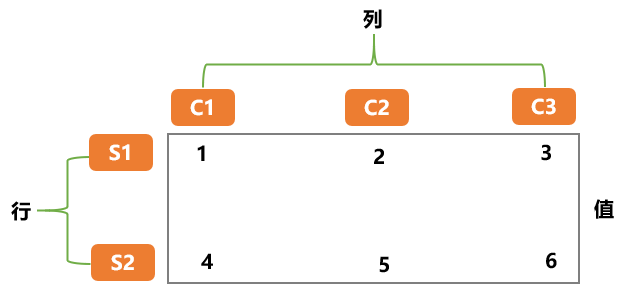

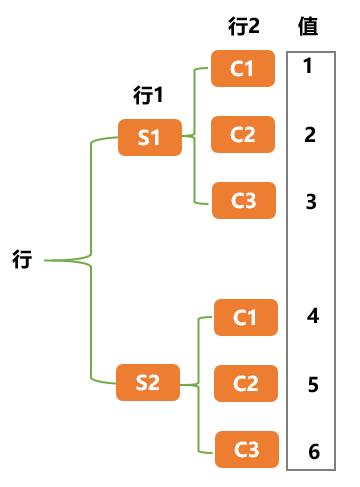

In [93]:
data = {"C1":[1,4],
        "C2":[2,5],
        "C3":[3,6]}
df611 = pd.DataFrame(data,index = ["S1","S2"])
df611

,C1,C2,C3
S1,1,2,3
S2,4,5,6


In [94]:
df611.stack()

S1  C1    1
    C2    2
    C3    3
S2  C1    4
    C2    5
    C3    6
dtype: int64

In [95]:
df611.stack().unstack()

,C1,C2,C3
S1,1,2,3
S2,4,5,6


## 长宽表转换 

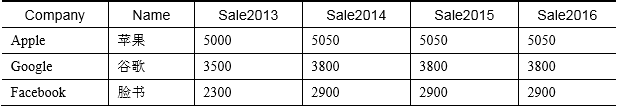

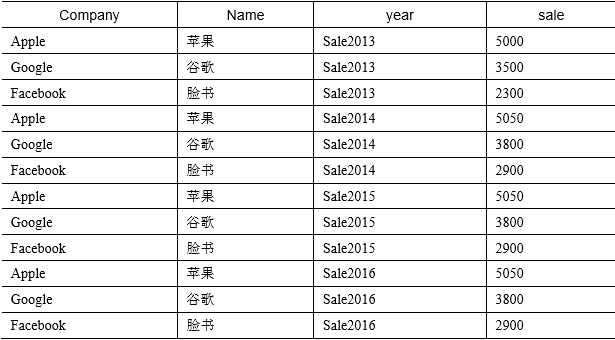

In [100]:
columns = ["Company","Name","Sale2013","Sale2014","Sale2015","Sale2016"]
data = [["Apple","苹果",5000,5050,5050,5050],
        ["Google","谷歌",3500,3800,3800,3800],
        ["Facebook","脸书",2300,2900,2900,2900]]
df612 = pd.DataFrame(data,columns = columns)
df612

,Company,Name,Sale2013,Sale2014,Sale2015,Sale2016
0,Apple,苹果,5000,5050,5050,5050
1,Google,谷歌,3500,3800,3800,3800
2,Facebook,脸书,2300,2900,2900,2900


In [122]:
df612.set_index(["Company","Name"]).stack().reset_index()

,Company,Name,level_2,0
0,Apple,苹果,Sale2013,5000
1,Apple,苹果,Sale2014,5050
2,Apple,苹果,Sale2015,5050
3,Apple,苹果,Sale2016,5050
4,Google,谷歌,Sale2013,3500
5,Google,谷歌,Sale2014,3800
6,Google,谷歌,Sale2015,3800
7,Google,谷歌,Sale2016,3800
8,Facebook,脸书,Sale2013,2300
9,Facebook,脸书,Sale2014,2900


In [108]:
df612.melt(id_vars = ["Company","Name"],
           var_name = "Year",
           value_name = "Sale")   

,Company,Name,Year,Sale
0,Apple,苹果,Sale2013,5000
1,Google,谷歌,Sale2013,3500
2,Facebook,脸书,Sale2013,2300
3,Apple,苹果,Sale2014,5050
4,Google,谷歌,Sale2014,3800
5,Facebook,脸书,Sale2014,2900
6,Apple,苹果,Sale2015,5050
7,Google,谷歌,Sale2015,3800
8,Facebook,脸书,Sale2015,2900
9,Apple,苹果,Sale2016,5050


id_vars 参数用于指明宽表转换到长表时保持不变的列，

var_name 参数示原来的列索引转化为“行索引”以后对应的列名，

value_name 表示新索引对应的值的列名。

**长表转换为宽表**就是做数据透视表，数据透视表在后面章节专门介绍

## apply与applymap函数 

In [112]:
df611

,C1,C2,C3
S1,1,2,3
S2,4,5,6


In [123]:
df611["C2"].apply(lambda x:x+2)

S1    4
S2    7
Name: C2, dtype: int64

In [113]:
df611.applymap(lambda x:x*2)

,C1,C2,C3
S1,2,4,6
S2,8,10,12


# 开始烹调-数据运算

## 算术运算 
常规的加减乘除

In [129]:
df611

,C1,C2,C3
S1,1,2,3
S2,4,5,6


In [126]:
df611["C1"] + df611["C2"]

S1    3
S2    9
dtype: int64

In [127]:
df611["C1"] - df611["C2"]

S1   -1
S2   -1
dtype: int64

In [128]:
df611["C1"] * df611["C2"]

S1     2
S2    20
dtype: int64

In [130]:
df611["C1"] / df611["C2"]

S1    0.5
S2    0.8
dtype: float64

## 比较运算 

In [131]:
df611["C1"] > df611["C2"]

S1    False
S2    False
dtype: bool

In [135]:
df611["C1"] >= df611["C2"]

S1    False
S2    False
dtype: bool

In [137]:
df611["C1"] < df611["C2"]

S1    True
S2    True
dtype: bool

In [134]:
df611["C1"] != df611["C2"]

S1    True
S2    True
dtype: bool

## 汇总运算 

| 函数 | 说明 |
|-----|-----|
|count|非NA值得数量|
|mean|平均值|
|sum|求和|
|max|求最大值|
|min|求最小值|
|median|中位数|
|mode|求众数|
|var|方差|
|std|标准差|
|quantile|求分位数|
|corr|相关系数|

In [124]:
df611

,C1,C2,C3
S1,1,2,3
S2,4,5,6


In [138]:
df611.count()

C1    2
C2    2
C3    2
dtype: int64

In [139]:
df611.count(axis=1)

S1    3
S2    3
dtype: int64

In [141]:
df611["C1"].count()

2

In [142]:
df611.sum()

C1    5
C2    7
C3    9
dtype: int64

In [143]:
df611.sum(axis = 1)

S1     6
S2    15
dtype: int64

In [144]:
df611["C1"].sum()

5

In [149]:
df611.quantile(0.5)

C1    2.5
C2    3.5
C3    4.5
Name: 0.5, dtype: float64

In [249]:
#两变量的相关系数
df112["年龄"].corr(df112["月收入"])

0.037715654211039604

In [194]:
#相关系数矩阵
df112.corr()

,用户编号,年龄,负债率,月收入,逾期90天笔数,逾期60-89天笔数,家庭成员
用户编号,1.000000,0.004390,-0.002938,0.002628,-0.001104,-0.000777,-0.000045
年龄,0.004390,1.000000,0.024192,0.037716,-0.061005,-0.057160,-0.213303
负债率,-0.002938,0.024192,1.000000,-0.028712,-0.008321,-0.007534,-0.040684
月收入,0.002628,0.037716,-0.028712,1.000000,-0.012743,-0.011116,0.062648
逾期90天笔数,-0.001104,-0.061005,-0.008321,-0.012743,1.000000,0.992796,-0.010175
逾期60-89天笔数,-0.000777,-0.057160,-0.007534,-0.011116,0.992796,1.000000,-0.010922
家庭成员,-0.000045,-0.213303,-0.040684,0.062648,-0.010175,-0.010922,1.000000
